# <font color='black'> Homework group: </font>
Abby Tien (20758949) and Nicholas Butt (20757197)

# <font color='orange'> Problem 1 </font>
After three consecutive years with less snowfall in January in Waterloo, the mayor is considering reducing expenses with snow plowing equipment. Currently, the city can handle plowing up to 3 cm of snow per day from public areas. The mayor requested a study that indicated that a 33% reduction (i.e., to 2 cm of snow per day) of plowing capacity in January would save $500,000. However, another independent study also indicates that when street plowing is inefficient fewer people leave their homes, leading to an economic impact of \$50,000/day with insufficient snow plowing.
Suggested steps:

*   Calculate the amount of snow, say S, on the ground each day considering (i) how much snow fell today, and (ii) the backlog of snow plowing from previous days, which is a function of the plowing capacity C.
*   For each day where S > 0, it will cost $50,000 for the city.
*   Run multiple realizations and calculate the total loss per realization, i.e., the sum of the losses across all days of January.
*   Run 2 scenarios, one where C=3 and one where C=2.
*   Determine the differences in costs and losses between the scenarios and make a recommendation.

Note: this problem is meant to make extensive use of the SYDE599_Simulations colab notebook provided to you during Week 4. Consequently, we will assume that snowfall = snow accumulated on the ground. That is, we are ignoring snow melting from any sources and we are assuming that snow falls evenly- that is, 1 cm of snow fall = 1 cm of snow that must be plowed off the streets.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
from plotnine import *

rng = default_rng(13)

In [2]:
# ==============================================================================
# ========== You do not need to make changes to this cell ======================
# ==============================================================================

def runScenarios(p,m,s,n,t,c):

    theProbOfSnowyDay = p
    theMeanAmountOfSnow = m
    theStdevAmountOfSnow = s
    theNumberOfRealizations = n
    theTime = t
    thePlowingCapacity = c

    df_realizations = pd.DataFrame()
    df_realizations['Time'] = theTimes 

    # Run n realizations per scenario
    for j in range(theNumberOfRealizations): 

        theRealizationResults = [] # empty list to store loss results of this realization. It is reseted on each j (i.e., realization)
        theSnowFall = [] # empty list to store the total snow accumlated on the roats

        # Each realization consists of a simulation of 31 days
        for t in range(len(theTime)): # it stops when it gets to 32, hence 31 days are simulated

            # Get hold of the probability that it will snow today for this scenario
            theProbabilityForThisScenario = theProbOfSnowyDay 

            # Check if it will snow today
            if rng.random() < theProbabilityForThisScenario: # if this is true, it is a snowy day

                # Simulate the amount of snow that falls today
                theAmountOfSnowToday = rng.normal(loc=theMeanAmountOfSnow,scale=theStdevAmountOfSnow)

                # This is just making things nice to plot
                # Calculate the accumulated amount of snow
                if t == 0: # if this is not the first day
                    if theAmountOfSnowToday - c >= 0:
                        theSnowFall.append(theAmountOfSnowToday - c) 
                        theRealizationResults.append(50000)
                    else:
                        theSnowFall.append(0) # all snow has been plowed for the day
                        theRealizationResults.append(0)
                else:
                    if theSnowFall[t-1] + theAmountOfSnowToday - c >= 0:
                        theSnowFall.append(theSnowFall[t-1] + theAmountOfSnowToday - c) 
                        theRealizationResults.append(50000)
                    else:
                        theSnowFall.append(0) # all snow has been plowed for the day
                        theRealizationResults.append(0)

            # In case it did not snow today
            else:
                theAmountOfSnowToday = 0

                # This is just making things nice to plot
                # Calculate the accumulated amount of snow
                if t == 0:
                    theSnowFall.append(theAmountOfSnowToday) # if this is the first day of the simulation
                    theRealizationResults.append(0)
                else:
                    if theSnowFall[t-1] - c >= 0:
                        theSnowFall.append(theSnowFall[t-1] - c) 
                        theRealizationResults.append(50000)
                    else:
                        theSnowFall.append(0) # all snow has been plowed for the day
                        theRealizationResults.append(0)
        

        # Once we get here we have data for all days of the month - that is, we completed one realization of this scenario
        # Let's save this to a dataframe
        df_realizations['Realization_' + str(j)] = theRealizationResults
    
    df_realizations['Mean'] = df_realizations.drop('Time',axis=1).mean(axis=1)
    df_realizations.loc['Sum']= df_realizations.sum()

    return df_realizations

In [3]:
# Define the scenario
theProbOfSnowyDay = 0.51935  # 16.1 average snowy days in month of January, i.e., prob of snowy day = 16.1/31
theMeanAmountOfSnow = 2.714   # 43.7 cm in January where 16.1 days of snow on average, so 43.7/16.1= cm snow per snowy day on average
theStdevAmountOfSnow = 0.5428  # assumed a 20% coefficient of variation


# Number of realizations
theNumberOfRealizations = 1000

# Time steps
theTimes = list(range(1,32,1)) # 31 days

df_realizations_c3 = runScenarios(theProbOfSnowyDay,theMeanAmountOfSnow,theStdevAmountOfSnow,theNumberOfRealizations,theTimes, 3)
df_realizations_c2 = runScenarios(theProbOfSnowyDay,theMeanAmountOfSnow,theStdevAmountOfSnow,theNumberOfRealizations,theTimes, 2)

C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\nickb\AppData\Local\Temp\ipykernel_34660\1486218808.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

In [4]:
#Cost Difference

#Plowing capacity of 3cm per day
print('The total cost of plowing 3cm per day is ${:,.2f}'.format(df_realizations_c3['Mean'].iloc[-1],2))

#Plowing capacity of 2cm per day
print('The cost of plowing 2cm per day is ${:,.2f}'.format(df_realizations_c2['Mean'].iloc[-1],2))
print('Considering the $500,000 savings from reducing the plowing capacity, the total cost of plowing 2cm per day is ${:,.2f}'.format(df_realizations_c2['Mean'].iloc[-1]-500000))
print()
if df_realizations_c3['Mean'].iloc[-1] < df_realizations_c2['Mean'].iloc[-1]-500000:
    savings = df_realizations_c2['Mean'].iloc[-1]-500000-df_realizations_c3['Mean'].iloc[-1]
    print('It is recommended to maintain the 3 cm per day plowing capacity to save ${:,.2f}'.format(savings,2))
else:
    savings = df_realizations_c3['Mean'].iloc[-1]-df_realizations_c2['Mean'].iloc[-1]-500000
    print('It is recommended to switch to 2 cm per day plowing capacity to save ${:,.2f}'.format(savings,2))

The total cost of plowing 3cm per day is $279,800.00
The cost of plowing 2cm per day is $900,950.00
Considering the $500,000 savings from reducing the plowing capacity, the total cost of plowing 2cm per day is $400,950.00

It is recommended to maintain the 3 cm per day plowing capacity to save $121,150.00


# <font color='orange'> Problem 2 </font>
In this problem, you will strengthen your understanding of agent-based simulation via object-oriented programming by build a game of fetch similar to the one created in class. The rules are similar: animals are randomly placed on a 50x50 units field; each animal has a speed and; the animals’ speed determines if they can get a treat that is randomly placed in field.

Suggested steps:
1. Create the Animal class, give it the class variables (i.e., or attributes) and class functions (i.e., behaviours) as shown in Fig. 1.
2. Create the Air Animal, Land Animal, and Water Animal classes. These classes must inherit the attributes and behaviours of Animal. Each type of animal also has a unique attribute and behaviour related to its speed under certain conditions.
    a. The Air Animals class represents a generic animal that can fly. The flight speed of a generic Air Animal is flight_speed ~ N(5,2.5). However, Air Animals can only fly if the sky is not foggy.
    b. The Land Animals class represents a generic animal that can walk on land. The walk speed depends on the terrain. If the terrain is ‘Land’, the walk speed of a generic Land Animal is walk_speed ~ N(5,2.5). If the terrain is ‘Sand’, the walk_speed is reduced by 50%. If the terrain is ‘Water’, the walk_speed is zero.
    c. The Water Animals class represent a generic animal that can swim. The swim speed speed is swim_speed ~ N(5,2.5) if the terrain is ‘Water’ and zero otherwise.
3. Next, create a class for each animal.
    a. The Dog is a Land Animal, and its walk_speed is the same as that of a Land Animal.
    b. The Seal is a Land Animal and a Water Animal. However, the Seal’s walk_speed is 30% of that of a generic Land Animal, and the Seal’s swim speed is 200% of that of a generic Water Animal.
    c. The Goose is a Land Animal and Water Animal and Air Animal. However, the Goose’s walk_speed is 30% of that of a generic Land Animal, the Goose’s swim_speed is 30% of that of a generic Water Animal, and the Goose’s flight speed the same of a generic Air Animal.
4. Instantiate 10 animals of each class.
5. Simulate 60 games of fetch. Exactly 30 games should be on foggy days and exactly 30 should not. Exactly 20 games should be on land, sand, and water each. In each game, one animal from each group of 10 is selected to play.
6. Plot the results of the 60 games on a X-Y plot where the abscissa is the number of games played so far and the ordinate shows the points for each animal, i.e., dogs, seals, and geese.

In [5]:
class Animal():
    def __init__(self):
        self.x = 0
        self.y = 0

    def getSpeed(self):
        return self.actual_speed

    def setPosition(self,width,height):
        self.x = rng.random() * width
        self.y = rng.random() * height

    def fetch(self,x,y):
        delta_x = (x - self.x)**2
        delta_y = (y - self.y)**2
        delta = np.sqrt(delta_x + delta_y)
        return delta / self.actual_speed if self.actual_speed > 0 else 9999999


class AirAnimal(Animal): 
    def __init__(self):
        self.flight_speed = max(rng.normal(loc=5,scale=2.5),0) # loc = mean, scale = stdev

    def setFlightSpeed(self, fog):
        if fog == True:
            self.flight_speed = 0
        return self.flight_speed

class LandAnimal(Animal): 
    def __init__(self):
        self.walk_speed = max(rng.normal(loc=5,scale=2.5),0) # loc = mean, scale = stdev

    def setWalkSpeed(self, terrain):
        if terrain == 'Land':
            return self.walk_speed
        elif terrain == 'Sand':
            return 0.5*self.walk_speed
        else:
            return 0

class WaterAnimal(Animal): 
    def __init__(self):
        self.swim_speed = max(rng.normal(loc=5,scale=2.5),0) # loc = mean, scale = stdev

    def setSwimSpeed(self, terrain):
        if terrain == 'Water':
            return self.swim_speed
        else:
            return 0

class Dog(LandAnimal):
    def __init__(self):
        self.actual_speed = 0
        LandAnimal.__init__(self)
    
    def setActualSpeed(self, terrain):
        self.actual_speed = self.setWalkSpeed(terrain)

class Seal(LandAnimal, WaterAnimal):
    def __init__(self):
        self.actual_speed = 0
        LandAnimal.__init__(self)
        WaterAnimal.__init__(self)
    
    def setActualSpeed(self, terrain):
        if terrain == 'Water':
            self.actual_speed = (self.setSwimSpeed(terrain))*2
        else:
            self.actual_speed = (self.setWalkSpeed(terrain))*0.3
            
class Goose(LandAnimal, WaterAnimal, AirAnimal):
    def __init__(self):
        self.actual_speed = 0
        LandAnimal.__init__(self)
        WaterAnimal.__init__(self)
        AirAnimal.__init__(self)
    
    def setActualSpeed(self, terrain, fog):
        if fog == True:
            if terrain == 'Water':
                self.actual_speed = (self.setSwimSpeed(terrain))*0.3
            else:
                self.actual_speed = (self.setWalkSpeed(terrain))*0.3
        else:
            self.actual_speed = self.setFlightSpeed(fog)

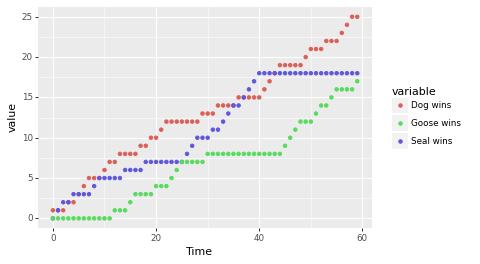

<ggplot: (124036799738)>

In [6]:
theListOfDogs = []
theListOfSeals = []
theListOfGeese = []
for i in range(10):
    theListOfDogs.append(Dog())
    theListOfSeals.append(Seal())
    theListOfGeese.append(Goose())

# Grid properties
theWidth = 50
theHeight = 50

numberOfRealizations = 60
numFog = 0
numNotFog = 0
numLand = 0
numSand = 0
numWater = 0

theDogPoints = 0
theSealPoints = 0
theGoosePoints = 0

theTime = []
theDogsProgress = []
theSealsProgress = []
theGeeseProgress = []

# Loop over the number of realizations
for r in range(numberOfRealizations):
    # Choosing the fog conditions
    if numFog == 30:
        theFog = False
        numNotFog += 1
    elif numNotFog == 30:
        theFog = True
        numFog += 1
    else:
        theFog = rng.choice(a=[True,False],p=[1/2,1/2])
        if theFog == True:
            numFog += 1
        else:
            numNotFog += 1
    
    # Choosing the terrain
    terrainChosen = False
    while not terrainChosen:
        theTerrain = rng.choice(a=['Land','Sand', 'Water'],p=[1/3,1/3, 1/3])
        if theTerrain == 'Land':
            if numLand == 20:
                continue
            else:
                numLand += 1
                terrainChosen = True
        if theTerrain == 'Sand':
            if numSand == 20:
                continue
            else:
                numSand += 1
                terrainChosen = True
        if theTerrain == 'Water':
            if numWater == 20:
                continue
            else:
                numWater += 1 
                terrainChosen = True
    
    # Select one dog from the list of dogs
    theDogIndex = rng.integers(low=0,high=len(theListOfDogs))
    theDog = theListOfDogs[theDogIndex]
    theDog.setActualSpeed(theTerrain)
    # Select one seal from the list of seals
    theSealIndex = rng.integers(low=0,high=len(theListOfSeals))
    theSeal = theListOfSeals[theSealIndex]
    theSeal.setActualSpeed(theTerrain)
    # Select one goose from the list of geese
    theGooseIndex = rng.integers(low=0,high=len(theListOfGeese))
    theGoose = theListOfGeese[theGooseIndex]
    theGoose.setActualSpeed(theTerrain, theFog)

    # Randomly place the dog in the field
    theDog.setPosition(theWidth,theHeight)
    # Randomly place the seal in the field
    theSeal.setPosition(theWidth,theHeight)
    # Randomly place the goose in the field
    theGoose.setPosition(theWidth,theHeight)
    # Randomly place the treat in the field
    theTreat_x = rng.random() * theWidth
    theTreat_y = rng.random() * theHeight

    # The time for the dog to reach the treat
    theDogTimeToTreat = theDog.fetch(theTreat_x,theTreat_y)
    # The time for the seal to reach the treat
    theSealTimeToTreat = theSeal.fetch(theTreat_x,theTreat_y)
    # The time for the goose to reach the treat
    theGooseTimeToTreat = theGoose.fetch(theTreat_x,theTreat_y)

    # Check who wins
    if theDogTimeToTreat < theSealTimeToTreat and theDogTimeToTreat < theGooseTimeToTreat:
        theDogPoints += 1
    elif theSealTimeToTreat < theDogTimeToTreat and theSealTimeToTreat < theGooseTimeToTreat:
        theSealPoints += 1
    elif theGooseTimeToTreat < theDogTimeToTreat and theGooseTimeToTreat < theSealTimeToTreat:
        theGoosePoints += 1
    elif theDogTimeToTreat == theSealTimeToTreat == theGooseTimeToTreat:
        theDogPoints += 0.33
        theSealPoints += 0.33
        theGoosePoints += 0.33
    elif theDogTimeToTreat == theSealTimeToTreat:
        theDogPoints += 0.5
        theSealPoints += 0.5
    elif theDogTimeToTreat == theGooseTimeToTreat:
        theDogPoints += 0.5
        theGoosePoints += 0.5
    else:
        theSealPoints += 0.5
        theGoosePoints += 0.5

    # Save variables
    theTime.append(r)
    theDogsProgress.append(theDogPoints)
    theSealsProgress.append(theSealPoints)
    theGeeseProgress.append(theGoosePoints)

df_plot = pd.DataFrame()
df_plot['Time'] = theTime
df_plot['Dog wins'] = theDogsProgress
df_plot['Seal wins'] = theSealsProgress
df_plot['Goose wins'] = theGeeseProgress

df_plot_long = pd.melt(df_plot,id_vars='Time')

ggplot(df_plot_long,aes(x='Time',y='value',color='variable')) + geom_point()